In [1]:
print("hi Grace :)")

hi Grace :)


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas
from scipy.signal import argrelextrema
import scipy 

In [3]:
#add cell parameters in m^3 and K
vol = 3.603630933*10**(-5)
temp = 303.15

#add the equilibration time in seconds
equilibration = 1

 - Import the file in CSV format. This script assumes that the python file and data file are stored in the same folder.
 - For convenience, we store each column under a variable name

In [4]:
# importing the CSV file 
filename = 'Negative-positive-switching-negative-5-min_C01.csv'
this_textfile = pandas.read_csv(filename, sep=";",header=1)
print(this_textfile)

             time/s     Ewe/V  Pressure/bar (on Analog In1)      I/mA  \
0            0.0000 -0.055068                      0.845736  0.000000   
1            0.9998 -0.055087                      0.845106  0.000000   
2            1.0000 -0.056563                      0.844996 -0.584105   
3            2.0000 -0.060491                      0.845969 -0.587731   
4            3.0000 -0.061331                      0.845405 -0.587985   
...             ...       ...                           ...       ...   
115485  115258.8244 -0.001013                      0.840992  0.059036   
115486  115259.8244 -0.001109                      0.842103  0.069148   
115487  115260.8244 -0.000975                      0.841008  0.062725   
115488  115261.8244 -0.001051                      0.841257  0.062788   
115489  115262.8234 -0.000994                      0.841871  0.061007   

        cycle number  
0                0.0  
1                0.0  
2                0.0  
3                0.0  
4       

In [5]:
# storing each column as its own variable
time = this_textfile['time/s']
voltage = this_textfile['Ewe/V']
pressure = this_textfile['Pressure/bar (on Analog In1)']
current = this_textfile['I/mA']

- We smooth out the pressure data using a rolling mean.
- for nth data point and smoothing over 100 secs, display mean of (n-50) up to (n) and (n+50) to (n)
- this means you get null results for the first and last 50 data point
 

In [6]:
pressure_smooth = pressure.rolling(292, center=True).mean()

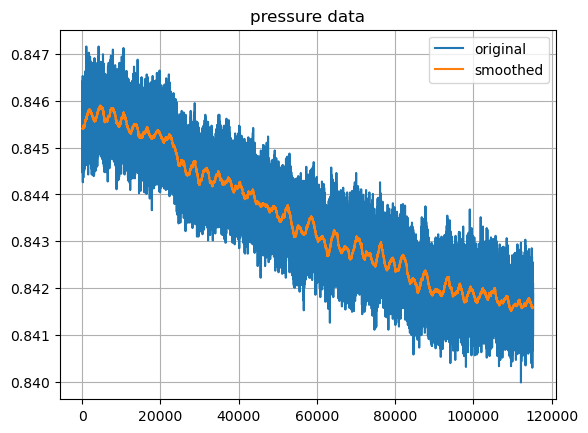

In [7]:
# plotting unsmoothed and smoothed pressure data for comparison
plt.plot(time, pressure, label = 'original')
plt.plot(time, pressure_smooth, label = 'smoothed')
plt.title('pressure data')
#plt.plot(86400,1.04,'o', label='Chopping point')
plt.grid()
plt.legend()
plt.show()

#save the smoothed pressure data for graph plotting 
np.savetxt("Smoothed_Pressure.txt", pressure_smooth)

 - Remove the rest period from the pressure data.
 - num_seconds is input: length of time to be removed from start of data

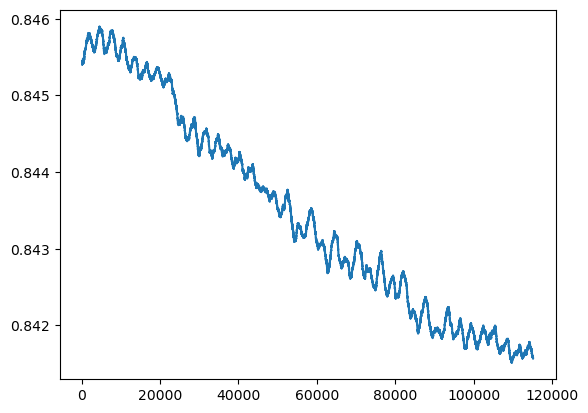

In [8]:
def chop_time_and_pressure(num_seconds):
    #remove first n seconds of the plot
    time_chopped = time[num_seconds: len(time)]
    pressure_smoothed_chopped = pressure_smooth[num_seconds: len(time)]
    plt.plot(time_chopped,pressure_smoothed_chopped)
    return time_chopped, pressure_smoothed_chopped

time_chop, pressure_chop = chop_time_and_pressure(equilibration)

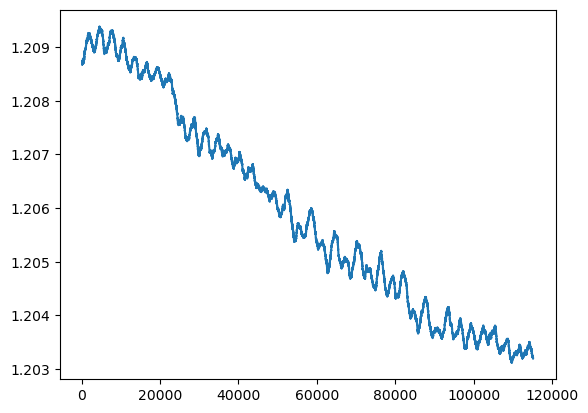

In [9]:
#convert smoothed pressure to mmol by changing pressure_chop to an array first
pressure_array = np.array(pressure_chop)
mmol = ((pressure_array*10**(8)*vol)/(8.3145*temp))

#save mmol data as a text file to make graphs
np.savetxt("mmol.txt", mmol)

#plot the mmol data 
plt.plot(time_chop,mmol)

#print(pressure_array)
#print(mmol)

(array([  1716,   4578,   7905,  10639,  13374,  16699,  19284,  22323,
        25427,  28777,  31878,  34874,  37417,  40339,  42643,  43750,
        46378,  49031,  52666,  55267,  58721,  61579,  64598,  67270,
        70341,  76563,  79578,  82201,  84659,  87831,  90805,  93778,
        96755,  99493, 102625, 105621, 108913, 111924, 114432],
      dtype=int64),)
[array([1.20926621, 1.20938691, 1.20931267, 1.20917612, 1.20882132,
       1.20872628, 1.20863051, 1.20850965, 1.20772101, 1.20769282,
       1.20748707, 1.20738009, 1.20718458, 1.20704779, 1.20676438,
       1.20681985, 1.20640616, 1.20631607, 1.2063424 , 1.20571848,
       1.2059975 , 1.20540543, 1.20556951, 1.20509149, 1.2053869 ,
       1.20520244, 1.20474302, 1.20482368, 1.20411131, 1.20434354,
       1.20377161, 1.20415021, 1.20395031, 1.20385227, 1.20381247,
       1.20380971, 1.20356326, 1.20345311, 1.20350469])]


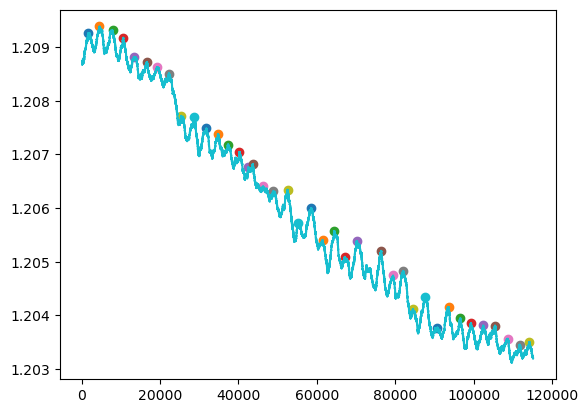

In [14]:
#Finding the maximum of the mmol data 
max_positions = argrelextrema(mmol, np.greater, order=900)
print(max_positions)

#the above gives you the positions of the data for the maximum values in the mmol data set so we need to convert this 
#to the actual time and mmol values  


#turning time_chop into an array 
time_array = np.array(time_chop)

#find the time values from max_positions
mmol_max_time = []
for a in max_positions:
    mmol_max_time.append(time_array[a])
    
#save the max mmol values 
np.savetxt("mmol_max_time.txt", mmol_max_time)
    
#find the mmol values from max_positions
mmol_max = []
for a in max_positions:
    mmol_max.append(mmol[a])

#save the max mmol values 
np.savetxt("mmol_max.txt", mmol_max)

#plot maximum values to manually check peak positions
plt.plot(mmol_max_time, mmol_max,'o') 
plt.plot(time_array, mmol) 


#print(mmol_max_time)
print(mmol_max)

(array([  3217,   5835,   9528,  12433,  14945,  17825,  20916,  24780,
        26983,  29995,  33401,  36076,  38908,  41721,  48090,  50824,
        54335,  56659,  60442,  62881,  66446,  68643,  72413,  75059,
        78077,  80247,  84036,  85967,  89679,  92072,  94946,  97902,
       101110, 103967, 106842, 109856, 112626], dtype=int64),)
1
[array([1.20890076, 1.20887161, 1.20874179, 1.2085311 , 1.20838959,
       1.20836978, 1.20825013, 1.20754596, 1.20724583, 1.20696802,
       1.20691563, 1.20696006, 1.20673157, 1.20652435, 1.20611642,
       1.2058288 , 1.20536806, 1.20544304, 1.20522396, 1.20478534,
       1.20487362, 1.2046825 , 1.20467795, 1.20446531, 1.20435044,
       1.20431414, 1.20393862, 1.20365943, 1.20357406, 1.20356009,
       1.20355148, 1.20337074, 1.20336279, 1.20344905, 1.20327701,
       1.20312039, 1.20319431])]


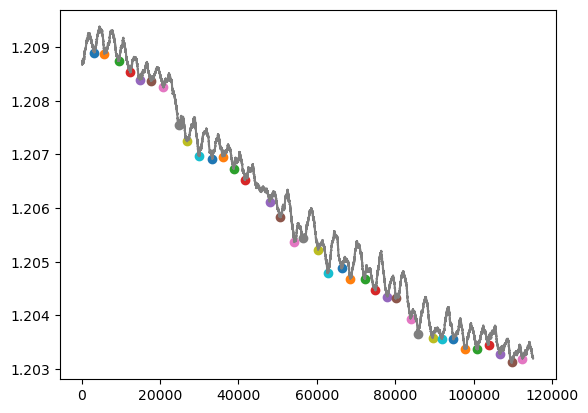

In [11]:
#Finding the minimum of the mmol data 
min_positions = argrelextrema(mmol, np.less, order=1200)
print(min_positions)
print(len(min_positions))

#the above gives you the positions of the data for the maximum values in the mmol data set so we need to convert this 
#to the actual time and mmol values  


#turning time_chop into an array 
time_array = np.array(time_chop)

#find the time values from min_positions
mmol_min_time = []
for a in min_positions:
    mmol_min_time.append(time_array[a])
    
#save the min mmol values 
np.savetxt("mmol_min_time.txt", mmol_min_time)
    
#find the mmol values from min_positions
mmol_min = []
for a in min_positions:
    mmol_min.append(mmol[a])

#save the min mmol values 
np.savetxt("mmol_min.txt", mmol_min)

#plot minimum values to manually check peak positions
plt.plot(mmol_min_time, mmol_min,'o') 
plt.plot(time_array, mmol) 

#print(mmol_min_time)
print(mmol_min)

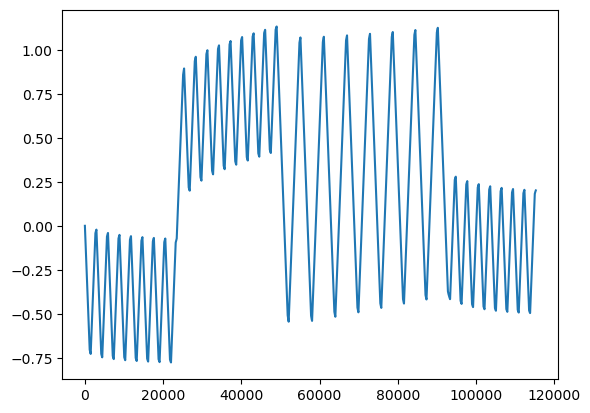

In [15]:
#integrate the current with respect to time to find the charge in coulombs 
#convert the current into an array and then into A instead of mA
current_array = np.array(current)
current_A = current_array/1000
#print(current_array)
#print(current_A)

#integrate current with respect to time 
charge = scipy.integrate.cumtrapz(y=current_A, x=time)
#print(charge)

#plot charge against time as a check 
plt.plot(time[1:len(time)], charge)


In [16]:
#cut the charge data to remove the equilibration time 
charge_chop = charge[equilibration:len(charge)]
#print(charge_chop)
#plt.plot(time_chop[1:len(time)], charge_chop)

(array([  2955,   5918,   8868,  11809,  14745,  17675,  20603,  25419,
        28414,  31394,  34365,  37329,  40287,  43240,  46189,  49134,
        55223,  61213,  67147,  73026,  78854,  84638,  90385,  94981,
        97931, 100872, 103805, 106732, 109654, 112572], dtype=int64),)
[array([  2949.2163,   5904.8417,   8847.0386,  11781.135 ,  14709.3846,
        17632.4849,  20553.3217,  25358.6084,  28346.863 ,  31320.035 ,
        34283.45  ,  37239.9862,  40191.0584,  43137.5028,  46079.4676,
        49017.5612,  55099.5814,  61082.6116,  67008.9825,  72881.2319,
        78702.8491,  84479.4719,  90219.4578,  94805.7925,  97748.817 ,
       100682.7393, 103609.4144, 106529.2601, 109443.7198, 112354.0227])]
[array([-0.02157877, -0.04050126, -0.05137091, -0.05870496, -0.06432277,
       -0.06869577, -0.07209273,  0.89373029,  0.9602399 ,  0.99737914,
        1.0251564 ,  1.04977658,  1.07240611,  1.09343423,  1.11339655,
        1.13232234,  1.06992652,  1.07394357,  1.08164792,  1.0

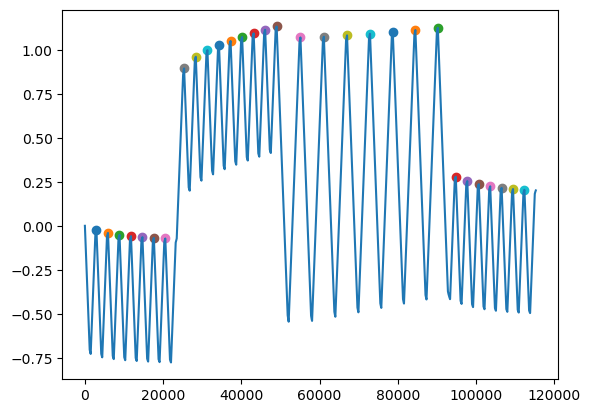

In [17]:
#find the maximum peaks for the charge data 
max_positions_charge = argrelextrema(charge_chop, np.greater, order=1000)
print(max_positions_charge)

#the above gives you the positions of the data for the maximum values in the charge data set so we need to convert this 
#to the actual time and charge values  

#find the time values from max_positions_charge
charge_max_time = []
for a in max_positions_charge:
    charge_max_time.append(time_array[a])
    
#save the time corresponding to the max charge values 
np.savetxt("charge_max_time.txt", charge_max_time)
    
#find the charge values from max_positions_charge
charge_max = []
for a in max_positions_charge:
    charge_max.append(charge_chop[a])

#save the max charge values 
np.savetxt("charge_max.txt", charge_max)

#plot maximum values to manually check peak positions
plt.plot(charge_max_time, charge_max,'o') 
plt.plot(time_chop[1:len(time)], charge_chop) 


print(charge_max_time)
print(charge_max)


(array([  1483,   4445,   7396,  10339,  13277,  16209,  19137,  22063,
        26857,  29865,  32847,  35817,  38779,  41736,  44688,  47636,
        52209,  58198,  64158,  70064,  75917,  81721,  87487,  93521,
        96470,  99411, 102344, 105271, 108194, 111113, 114029],
      dtype=int64),)


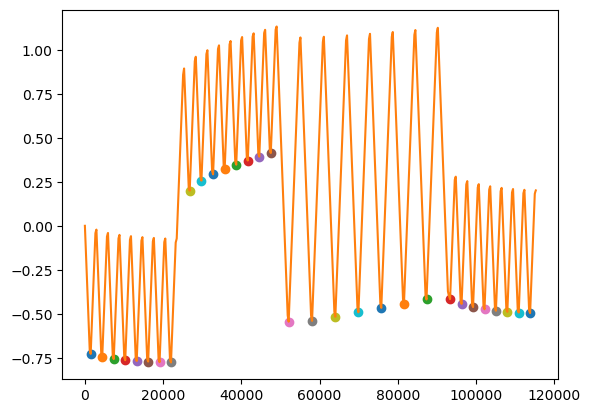

In [18]:
#find the minimum peaks for the charge data 
min_positions_charge = argrelextrema(charge_chop, np.less, order=1000)
print(min_positions_charge)

#the above gives you the positions of the data for the minimum values in the charge data set so we need to convert this 
#to the actual time and charge values  

#find the time values from min_positions_charge
charge_min_time = []
for a in min_positions_charge:
    charge_min_time.append(time_array[a])
    
#save the time corresponding to the min charge values 
np.savetxt("charge_min_time.txt", charge_min_time)
    
#find the charge values from min_positions_charge
charge_min = []
for a in min_positions_charge:
    charge_min.append(charge_chop[a])

#save the min charge values 
np.savetxt("charge_min.txt", charge_min)

#plot minimum values to manually check peak positions
plt.plot(charge_min_time, charge_min,'o') 
plt.plot(time_chop[1:len(time)], charge_chop) 


#print(charge_min_time)
#print(charge_min)

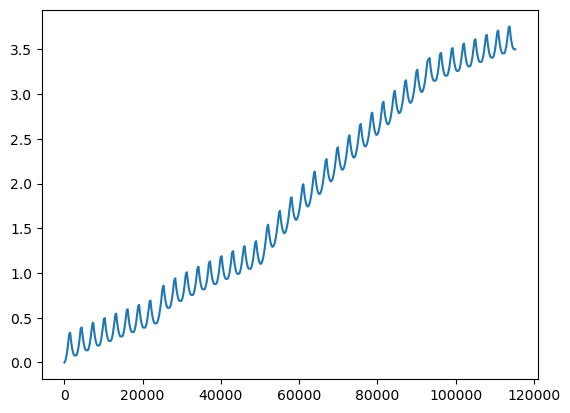

In [19]:
#integrate the potential with respect to charge to get the energy in J
#set the voltage data as the same length as charge
potential = voltage[1:len(voltage)]
#integrate current with respect to time 
energy = scipy.integrate.cumtrapz(y=potential, x=charge)

#plot charge against time as a check 
plt.plot(time[2:len(time)], energy)

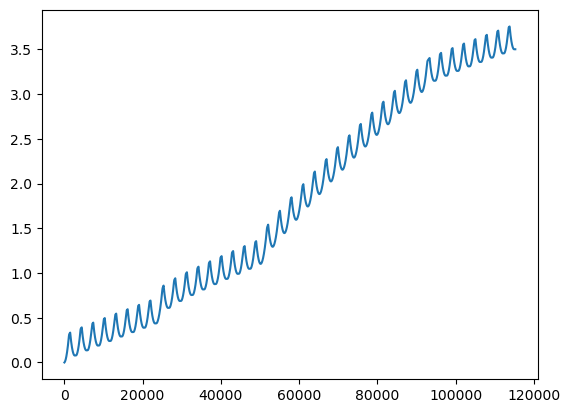

In [20]:
#cut the energy data to remove the equilibration time 
energy_chop = energy[equilibration:len(time)]
#print(energy_chop)
plt.plot(time_chop[2:len(time)], energy_chop)

(array([  1482,   4444,   7395,  10338,  13276,  16208,  19136,  22062,
        25418,  28413,  31393,  34364,  37328,  40286,  43239,  46188,
        49133,  52208,  55222,  58197,  61212,  64157,  67146,  70063,
        73025,  75916,  78853,  81720,  84637,  87486,  90384,  93520,
        96469,  99410, 102343, 105270, 108193, 111112, 114028],
      dtype=int64),)


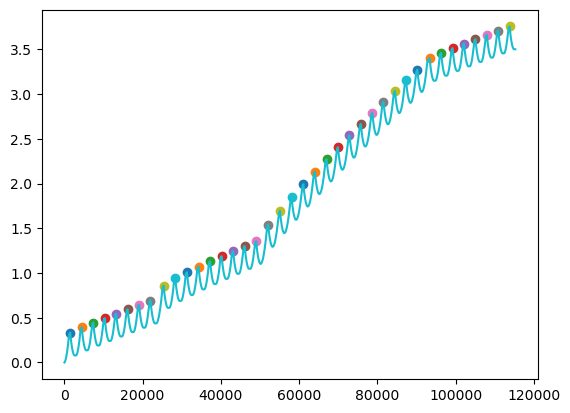

In [21]:
#find the maximum peaks for the energy data 
max_positions_energy = argrelextrema(energy_chop, np.greater, order=100)
print(max_positions_energy)

#the above gives you the positions of the data for the maximum values in the energy data set so we need to convert this 
#to the actual time and energy values  

#find the time values from max_positions_energy
energy_max_time = []
for a in max_positions_energy:
    energy_max_time.append(time_array[a])
    
#find the energy values from max_positions_energy
energy_max = []
for a in max_positions_energy:
    energy_max.append(energy_chop[a])

#save the max energy values 
np.savetxt("energy_max.txt", energy_max)

#plot maximum values to manually check peak positions
plt.plot(energy_max_time, energy_max,'o') 
plt.plot(time_chop[2:len(time)], energy_chop) 


#print(energy_max_time)
#print(energy_max)

(array([  2954,   5917,   8867,  11808,  14744,  17674,  20602,  23527,
        26554,  29563,  32545,  35514,  38476,  41434,  44386,  47334,
        50276,  53353,  56357,  59354,  62344,  65313,  68276,  71217,
        74153,  77068,  79978,  82870,  85760,  88633,  91505,  94980,
        97930, 100871, 103804, 106731, 109653, 112571], dtype=int64),)


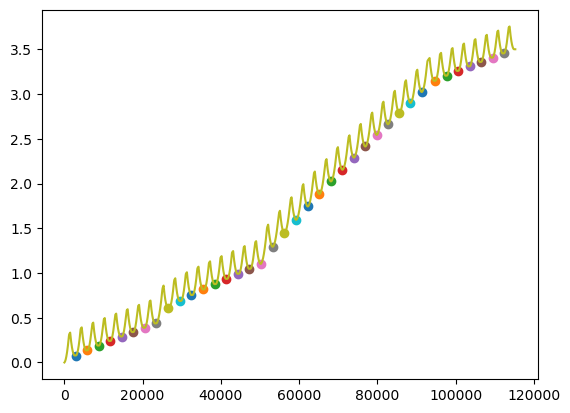

In [22]:
#find the minimum peaks for the energy data 
min_positions_energy = argrelextrema(energy_chop, np.less, order=100)
print(min_positions_energy)

#the above gives you the positions of the data for the minimum values in the energy data set so we need to convert this 
#to the actual time and energy values  

#find the time values from min_positions_energy
energy_min_time = []
for a in min_positions_energy:
    energy_min_time.append(time_array[a])
    
#find the energy values from min_positions_energy
energy_min = []
for a in min_positions_energy:
    energy_min.append(energy_chop[a])

#save the min energy values 
np.savetxt("energymin.txt", energy_min)
np.savetxt("energy.txt", energy)

#plot minimum values to manually check peak positions
plt.plot(energy_min_time, energy_min,'o') 
plt.plot(time_chop[2:len(time)], energy_chop) 


#print(energy_max_time)
#print(energy_max)

In [26]:
#celebrate that you are a coding genius! 

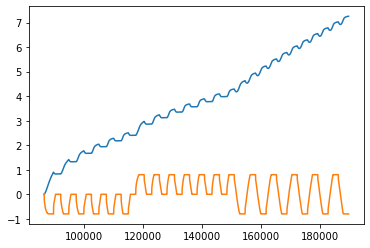

In [20]:
voltage_chop = voltage[equilibration:len(charge)]
plt.plot(time_chop[2:len(time)], energy_chop)
plt.plot(time_chop[3:len(time)],voltage_chop[2:len(time)])